 # WHAT  IS  SVM 

svm is a supervised learning algorithm that is used mostly for classification it tries to find the best line or curve that separates data points of different classes with the maximum margin .
full form  => support vector machine .  

## TYPES OF SVM 

Linear SVM:
Works when data is linearly separable.

Non-Linear SVM:
When data isn't linearly separable, SVM uses a kernel trick to transform data into a higher dimension.

#### advantages of svm 

In [ ]:
Works well for high-dimensional spaces

Effective when the number of dimensions > number of samples

Memory efficient (only uses support vectors)



eg --> we have a basket of red apples and green apples . 
and we plot each apple on a graph based on weight and sweetness .  

--> now we want to draw a line that separate the red from the green apples 
    so svm helps to draw that line and not just any line but the best line ,        that leaves 
    the widest gap between the apples .  

--> that gap is called the margin 
--> the points which is closest to line is called the support vectors .

eg -->
    weight          sweetness          type of apple 



    step 1 -> each apple is represented as the points or a graph 
    step 2 -> now try to draw a line that separates the red from green apples , 
              their can be many possible lines but we have to draw the line                   that gives the max safety margin on both sides .  
    step  3 -> margin and support vectors 
               * the gap between the nearest red and green apple to line is the                  margin 
               * and the apples closets to the line are called support vectors                   because they support or define the boundaries . 






               y = mx+b ==> eq of line 
               and the goal of svm is to find the best M and B such that 
                ## i as a power in y           (y(i) * mx+b) >= 1 
                

#kernel trick --> a kernel is a function that maps your data to a higher dimensions without actually transforming the data memory .  

1 ) linear -> straight line separable 
2 ) polynomial -> use when data is in curve shaped 
3 ) sigmoid -> works as an neural network 

## hyperparameters in SVM 

In [ ]:
| Parameter | Description                                     |
| --------- | ----------------------------------------------- |
| `C`       | Regularization parameter (controls overfitting) |
| `kernel`  | Kernel type: 'linear', 'rbf', 'poly', etc.      |
| `gamma`   | Kernel coefficient for ‘rbf’, ‘poly’            |


In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\DATASET\\placement - placement.csv")

In [5]:
df.head(3)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1


In [6]:
x = df.drop(columns = ['placed'])
y = df['placed']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [9]:
from sklearn.svm import SVC


In [10]:
model = SVC(kernel = 'linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [12]:
import matplotlib.pyplot as plt 

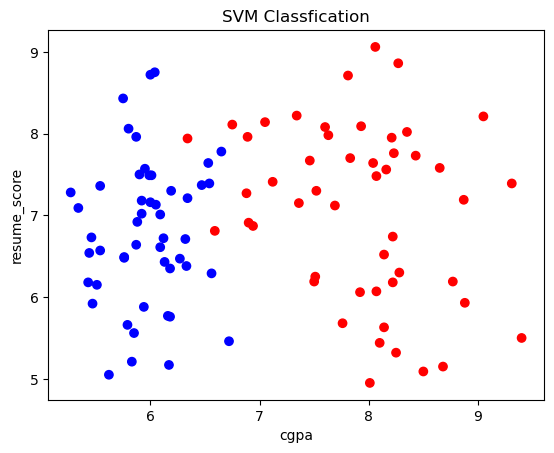

In [13]:
plt.scatter(x['cgpa'], x['resume_score'] , c = y , cmap = 'bwr')
plt.title("SVM Classfication")
plt.xlabel("cgpa")
plt.ylabel("resume_score")
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_pred = model.predict(x_test)

In [16]:
accuracy_score(y_test , y_pred)

1.0

In [17]:

## step  2 : plot the data points 



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


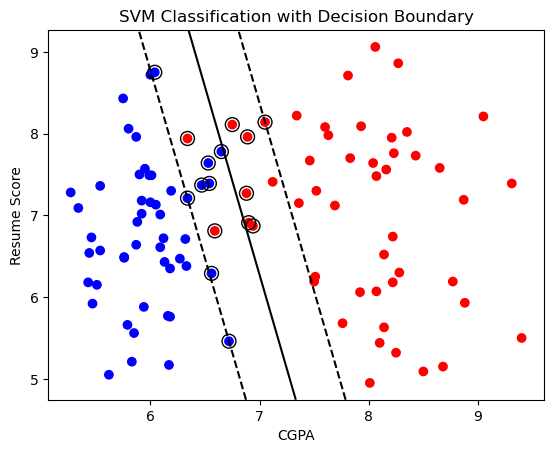

In [21]:
# Step 2: Plot the data points
plt.scatter(x['cgpa'], x['resume_score'], c=y, cmap='bwr')
plt.title("SVM Classification with Decision Boundary")
plt.xlabel("CGPA")
plt.ylabel("Resume Score")

# Step 3: Create a grid to evaluate the model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)
# Step 4: Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['-'])  # Decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 1], linestyles=['--'])  # Margins

# Step 5: Show support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.show()
